In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import os, shutil

In [18]:
# Dataset path and categories
origin_dataset_path = "../datasets_del_aug_duplicate"  # 기존 제공 데이터셋(중복, 증강 데이터 제거)
new_dataset_path = "../raw_data_new"  # 4팀(해파리냉채) 데이터셋
destination_path = "../new_combine_data"
categories = ["blue_jellyfish", "barrel_jellyfish", "compass_jellyfish", 
              "lions_mane_jellyfish", "mauve_stinger_jellyfish", "moon_jellyfish"]

In [25]:
# Move and merge datasets into a new directory
source_paths = [origin_dataset_path, new_dataset_path]
for category in categories:
    destination_category_path = os.path.join(destination_path, category)
    
    if not os.path.exists(destination_category_path):
        os.makedirs(destination_category_path)
    
    for source_path in source_paths:
        source_category_path = os.path.join(source_path, category)
        if os.path.exists(source_category_path):
            for file in os.listdir(source_category_path):
                if file.endswith(('jpg', 'jpeg', 'png', 'JPG', 'jfif')):
                    source_file = os.path.join(source_category_path, file)
                    destination_file = os.path.join(destination_category_path, file)
                    if not os.path.exists(destination_file):  # Avoid overwriting files with the same name
                        shutil.copy(source_file, destination_file)

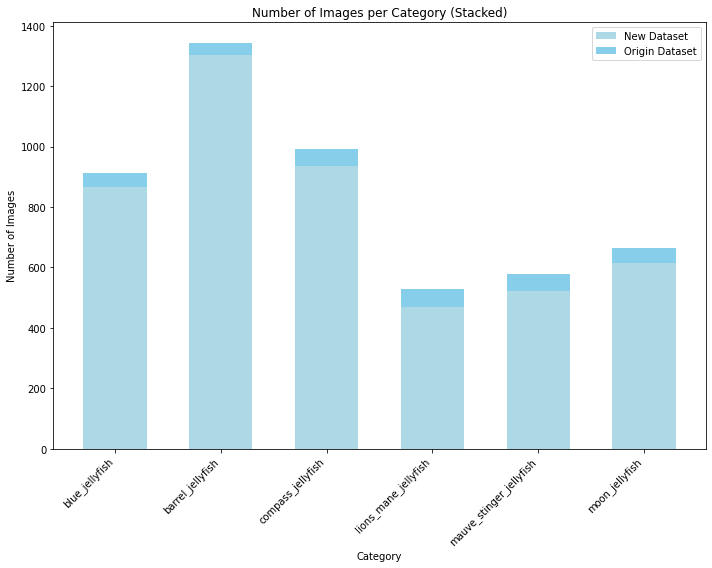

In [29]:
# Count images per category for each dataset
dataset_counts = {}
for dataset_name, dataset_path in zip(["Origin Dataset", "New Dataset", "Combined Dataset"], [origin_dataset_path, new_dataset_path, destination_path]):
    image_counts = {}
    for category in categories:
        category_path = os.path.join(dataset_path, category)
        if os.path.exists(category_path):
            image_counts[category] = len([file for file in os.listdir(category_path) if file.endswith(('jpg', 'jpeg', 'png', 'JPG', 'jfif'))])
        else:
            image_counts[category] = 0
    dataset_counts[dataset_name] = image_counts

# Plotting the number of images per category as a stacked bar chart
origin_counts = pd.Series(dataset_counts['Origin Dataset'])
new_counts = pd.Series(dataset_counts['New Dataset'])
combined_counts = pd.Series(dataset_counts['Combined Dataset'])

fig, ax = plt.subplots(figsize=(10, 8))
width = 0.6

# Plot New Dataset at the bottom and Origin Dataset on top
ax.bar(categories, new_counts, width, label='New Dataset', color='lightblue')
ax.bar(categories, origin_counts, width, bottom=new_counts, label='Origin Dataset', color='skyblue')

# Set titles and labels
ax.set_title('Number of Images per Category (Stacked)')
ax.set_xlabel('Category')
ax.set_ylabel('Number of Images')
ax.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


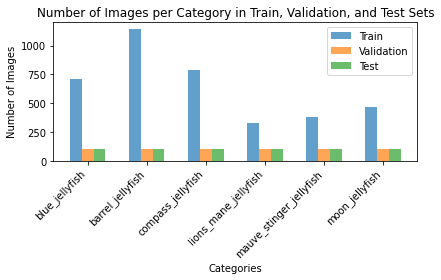

In [9]:
import os
import matplotlib.pyplot as plt
import numpy as np

# 데이터 경로 설정 (네가 설정해야 함)
train_dir = "../_preprocessed_new_combine_data/train"
val_dir = "../_preprocessed_new_combine_data/valid"
test_dir = "../_preprocessed_new_combine_data/test"

# 카테고리 리스트
categories = ["blue_jellyfish", "barrel_jellyfish", "compass_jellyfish", 
              "lions_mane_jellyfish", "mauve_stinger_jellyfish", "moon_jellyfish"]

# 각 데이터셋별 클래스별 이미지 수 계산 함수
def count_images_per_category(base_dir, categories):
    counts = []
    for category in categories:
        category_dir = os.path.join(base_dir, category)
        count = len([f for f in os.listdir(category_dir) if os.path.isfile(os.path.join(category_dir, f))])
        counts.append(count)
    return counts

# 이미지 수 계산
train_counts = count_images_per_category(train_dir, categories)
val_counts = count_images_per_category(val_dir, categories)
test_counts = count_images_per_category(test_dir, categories)

# 그룹형 막대 그래프 그리기
x = np.arange(len(categories))  # 카테고리 인덱스
width = 0.2  # 막대 너비

plt.bar(x - width, train_counts, width, label='Train', alpha=0.7)
plt.bar(x, val_counts, width, label='Validation', alpha=0.7)
plt.bar(x + width, test_counts, width, label='Test', alpha=0.7)

plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images per Category in Train, Validation, and Test Sets')
plt.xticks(x, categories, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()


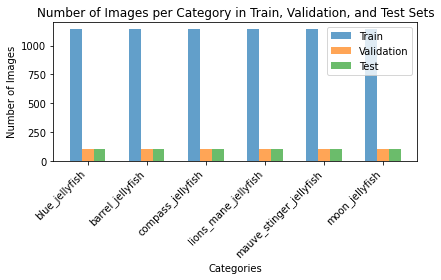

In [10]:
# 이미지  증강 후 이미지 수 계산
train_counts = count_images_per_category(train_dir, categories)
val_counts = count_images_per_category(val_dir, categories)
test_counts = count_images_per_category(test_dir, categories)

# 그룹형 막대 그래프 그리기
x = np.arange(len(categories))  # 카테고리 인덱스
width = 0.2  # 막대 너비

plt.bar(x - width, train_counts, width, label='Train', alpha=0.7)
plt.bar(x, val_counts, width, label='Validation', alpha=0.7)
plt.bar(x + width, test_counts, width, label='Test', alpha=0.7)

plt.xlabel('Categories')
plt.ylabel('Number of Images')
plt.title('Number of Images per Category in Train, Validation, and Test Sets')
plt.xticks(x, categories, rotation=45, ha='right')
plt.legend()

plt.tight_layout()
plt.show()
